### Homework_11
### Assignment_2_Solutions
### Achilles Edwin Alfred Saxby
### aes807

In [1]:
import zipfile
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Downloading and Prepping the Data.

In [2]:
zipcode_shape = gp.read_file('Data_Used/nyc-zip-code-tabulation-areas-polygons.geojson')
zipcode_shape.head()

@id  BLDGpostalCode CTY_FIPS  \
0  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
1  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
2  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
3  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
4  http://nyc.pediacities.com/Resource/PostalCode...               0      081   

   OBJECTID          PO_NAME STATE ST_FIPS    Shape_Area    Shape_Leng  \
0         1  Jackson Heights    NY      36  2.016328e+07  20624.692317   
1         2        Glen Oaks    NY      36  2.260653e+07  23002.816039   
2         3    New Hyde Park    NY      36  6.269333e+06  15749.161511   
3         4        Bellerose    NY      36  4.941836e+07  35932.810639   
4         5    Fresh Meadows    NY      36  6.938587e+07  38693.565676   

  borough                                           geometry postalCode  
0  Queens  POLYGON ((-73.86942457284175 40.74915687096787...      11372  
1  Queens  POLYGON ((-73.71068374074007 40.75004039450917...      11004  
2  Queens  POLYGON ((-73.70098278625547 40.73889569923034...      11040  
3  Queens  POLYGON ((-73.72270447144122 40.75373371438336...      11426  
4  Queens  POLYGON ((-73.81088634744755 40.72717187575918...      11365

NOTES: 
to read in a zip file without unzipping it you can use the pandas and zipfile packages

In [3]:
zipcode_shape.columns

Index(['@id', 'BLDGpostalCode', 'CTY_FIPS', 'OBJECTID', 'PO_NAME', 'STATE',
       'ST_FIPS', 'Shape_Area', 'Shape_Leng', 'borough', 'geometry',
       'postalCode'],
      dtype='object')

In [4]:
zipcode_shape = zipcode_shape.drop(['@id','BLDGpostalCode','CTY_FIPS','ST_FIPS',
                                    'OBJECTID','Shape_Area','Shape_Leng']
                                   , axis = 1)
zipcode_shape = zipcode_shape.rename(columns={'postalCode' : 'zip'})
zipcode_shape.head()

PO_NAME STATE borough  \
0  Jackson Heights    NY  Queens   
1        Glen Oaks    NY  Queens   
2    New Hyde Park    NY  Queens   
3        Bellerose    NY  Queens   
4    Fresh Meadows    NY  Queens   

                                            geometry    zip  
0  POLYGON ((-73.86942457284175 40.74915687096787...  11372  
1  POLYGON ((-73.71068374074007 40.75004039450917...  11004  
2  POLYGON ((-73.70098278625547 40.73889569923034...  11040  
3  POLYGON ((-73.72270447144122 40.75373371438336...  11426  
4  POLYGON ((-73.81088634744755 40.72717187575918...  11365

In [5]:
zipcode_shape['zip'] = pd.to_numeric(zipcode_shape['zip'])
zipcode_shape['zip']

0      11372
1      11004
2      11040
3      11426
4      11365
5      11373
6      11001
7      11375
8      11427
9      11374
10     11366
11     11423
12     11428
13     11432
14     11379
15     11429
16     11435
17     11415
18     11418
19     11433
20     11451
21     11221
22     11421
23     11419
24     11434
25     11216
26     11416
27     11233
28     11436
29     11213
       ...  
232    10106
233    10158
234    10041
235    10120
236    10278
237    10155
238    10022
239    10043
240    10081
241    10096
242    10097
243    10196
244    10196
245    10275
246    10265
247    10045
248    10047
249    10047
250    10080
251    10203
252    10259
253    10260
254    10285
255    10286
256    11370
257    10065
258    10075
259    10069
260    10281
261    10282
Name: zip, dtype: int64

In [6]:
year = []
for i in range(94, 100, 1):
    year.append(str(i))
for i in range(0, 10, 1):
    year.append('0'+str(i))
for i in range(10, 15, 1):
    year.append(str(i))

### Reading The Datafiles

- The Data is being read after downloading it into the archive where the code is being written now itself.
- Due to segregation purposes, the data will be stored in the "Data_Used" directory found in the archive itself.

In [11]:
for i in year:
    zf = zipfile.ZipFile('zbp'+ i +'totals.zip')
    business_data = pd.read_csv(zf.open('zbp'+i+'totals.zip'.replace('.zip','.txt')))
    print("Year "+str(i)+'\n')
    print(business_data.head())
    print('\n')

Year 94

    zip         name empflag   emp    qp1      ap  est
0  1001   Agawam, MA     NaN  6198  33601  155158  439
1  1002  Amherst, MA     NaN  6073  28924  127367  450
2  1003  Amherst, MA     NaN    68    367    1604   10
3  1004  Amherst, MA     NaN   210    844    4302   47
4  1005    Barre, MA     NaN   678   3010   13521   92


Year 95

    zip             name empflag   emp    qp1      ap  est
0   501   Holtsville, NY       B     0      0       0    2
1  1000  Springfield, MA     NaN    49    529    2127    4
2  1001       Agawam, MA     NaN  5920  32993  152512  439
3  1002      Amherst, MA     NaN  6153  31645  132699  467
4  1003      Amherst, MA     NaN    89    380    1698   10


Year 96

    zip             name empflag   emp    qp1      ap  est
0   501   Holtsville, NY       B     0      0       0    4
1  1000  Springfield, MA     NaN   161   1494    6671   11
2  1001       Agawam, MA     NaN  6130  37746  171045  433
3  1002      Amherst, MA     NaN  6441  32964  14

In [12]:
for i in year:
    zf = zipfile.ZipFile('zbp'+i+'totals.zip')
    temp = pd.read_csv(zf.open('zbp'+i+'totals.zip'.replace('.zip','.txt')))
    temp.columns = map(str.lower, temp.columns)
    temp = temp[['zip', 'est']]
    temp.rename(columns={'est' : 'est'+str(i)}, inplace=True)
    zipcode_shape = zipcode_shape.merge(temp, on = 'zip', how = 'inner')

In [13]:
zipcode_shape.shape

(243, 26)

In [14]:
zipcode_shape.columns

Index(['PO_NAME', 'STATE', 'borough', 'geometry', 'zip', 'est94', 'est95',
       'est96', 'est97', 'est98', 'est99', 'est00', 'est01', 'est02', 'est03',
       'est04', 'est05', 'est06', 'est07', 'est08', 'est09', 'est10', 'est11',
       'est12', 'est13', 'est14'],
      dtype='object')

In [15]:
zipcode_shape.head()

PO_NAME STATE borough  \
0  Jackson Heights    NY  Queens   
1        Glen Oaks    NY  Queens   
2    New Hyde Park    NY  Queens   
3        Bellerose    NY  Queens   
4    Fresh Meadows    NY  Queens   

                                            geometry    zip  est94  est95  \
0  POLYGON ((-73.86942457284175 40.74915687096787...  11372   1229   1236   
1  POLYGON ((-73.71068374074007 40.75004039450917...  11004    194    188   
2  POLYGON ((-73.70098278625547 40.73889569923034...  11040   1422   1414   
3  POLYGON ((-73.72270447144122 40.75373371438336...  11426    326    219   
4  POLYGON ((-73.81088634744755 40.72717187575918...  11365    492    476   

   est96  est97  est98  ...    est05  est06  est07  est08  est09  est10  \
0   1292   1309   1351  ...     1539   1527   1545   1538   1572   1629   
1    176    192    194  ...      225    226    238    227    233    229   
2   1335   1344   1344  ...     1441   1454   1488   1503   1475   1494   
3    209    198    203  ...      226    226    228    226    237    248   
4    483    522    509  ...      604    608    617    616    628    643   

   est11  est12  est13  est14  
0   1647   1724   1759   1768  
1    222    241    241    250  
2   1488   1510   1539   1534  
3    256    266    258    260  
4    677    679    714    731  

[5 rows x 26 columns]

### Whitening the Data

In [18]:
est_mean = zipcode_shape.iloc[:,range(5,26)].mean(axis = 1)
est_std = zipcode_shape.iloc[:,range(5,26)].std(axis = 1)
zipcode_shape.iloc[:,range(5,26)] = zipcode_shape.iloc[:,range(4,26)].apply(lambda x: (x- est_mean) / est_std)
zipcode_shape.head()

PO_NAME STATE borough  \
0  Jackson Heights    NY  Queens   
1        Glen Oaks    NY  Queens   
2    New Hyde Park    NY  Queens   
3        Bellerose    NY  Queens   
4    Fresh Meadows    NY  Queens   

                                            geometry    zip     est94  \
0  POLYGON ((-73.86942457284175 40.74915687096787...  11372 -1.650515   
1  POLYGON ((-73.71068374074007 40.75004039450917...  11004 -0.974535   
2  POLYGON ((-73.70098278625547 40.73889569923034...  11040 -0.118051   
3  POLYGON ((-73.72270447144122 40.75373371438336...  11426  3.212291   
4  POLYGON ((-73.81088634744755 40.72717187575918...  11365 -1.332578   

      est95     est96     est97     est98    ...        est05     est06  \
0 -1.607088 -1.259673 -1.154208 -0.893647    ...     0.272673  0.198227   
1 -1.248013 -1.794968 -1.065695 -0.974535    ...     0.438432  0.484012   
2 -0.234030 -1.379327 -1.248850 -1.248850    ...     0.157401  0.345867   
3 -0.444253 -0.785986 -1.161892 -0.991026    ...    -0.205040 -0.205040   
4 -1.549090 -1.454366 -0.926619 -1.102534    ...     0.183004  0.237132   

      est07     est08     est09     est10     est11     est12     est13  \
0  0.309896  0.266469  0.477400  0.831018  0.942687  1.420382  1.637516   
1  1.030967  0.529592  0.803069  0.620751  0.301694  1.167706  1.167706   
2  0.838780  1.056241  0.650313  0.925765  0.838780  1.157723  1.578149   
3 -0.136693 -0.205040  0.170867  0.546773  0.820159  1.161892  0.888506   
4  0.358920  0.345388  0.507772  0.710751  1.170839  1.197903  1.671522   

      est14  
0  1.693350  
1  1.577923  
2  1.505662  
3  0.956853  
4  1.901566  

[5 rows x 26 columns]

In [19]:
zipcode_shape.columns

Index(['PO_NAME', 'STATE', 'borough', 'geometry', 'zip', 'est94', 'est95',
       'est96', 'est97', 'est98', 'est99', 'est00', 'est01', 'est02', 'est03',
       'est04', 'est05', 'est06', 'est07', 'est08', 'est09', 'est10', 'est11',
       'est12', 'est13', 'est14'],
      dtype='object')

### Clustering
#### Clustering the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. 
#### Trying a few options and keeping in mind a few is more than a couple.
#### The following is plotted and observed.
#### Also, overlaying the data on a NYC map is done here.
#### The shapefiles for the zip codes and different colors for different clusters was used here.

In [22]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

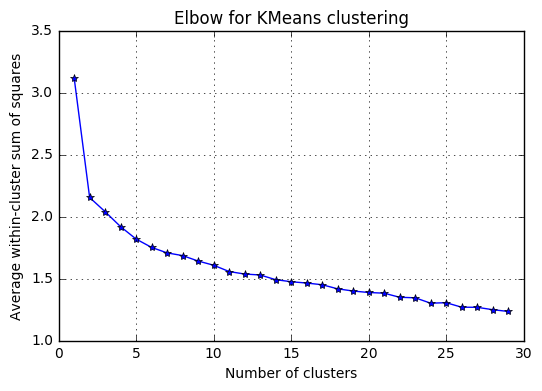

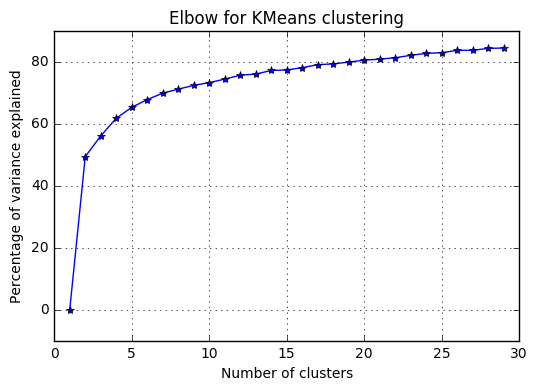

In [23]:
elbow(zipcode_shape.iloc[:, range(5,26)], range(1,30))

### Figure-1: The Elbow Method Plotting of the K-Means Algorithm to find the right number of clusters.
- The algorithm shows us that the best number of clusters to use is '2'.
- To show the range of the data, the plotting will be done for k-cluster numbers - 2/3/4.

In [28]:
X=zipcode_shape.iloc[:, range(5,26)]
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.5721428017768126
For n_clusters =3, the average silhouette_score is :0.54143502020183
For n_clusters =4, the average silhouette_score is :0.49560155046341525
For n_clusters =5, the average silhouette_score is :0.4788013519651
For n_clusters =6, the average silhouette_score is :0.23425277922480411
For n_clusters =7, the average silhouette_score is :0.26965321264133757
For n_clusters =8, the average silhouette_score is :0.14085788910009284
For n_clusters =9, the average silhouette_score is :0.206865493189978


- To follow up on the K-Means algorithm to cross-check and be assured of the right choice of clusters, the Silhouette-Score can also be calculated.
- The higher the score, the better the data will be segregated for that number of clusters.

### Plotting the cluster centers (K means was used here so the centers are the means of the clusters).

### Plotting for K-Means Cluster Number = 2

In [31]:
mod_km_2 = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
                verbose=0, random_state=None).fit(X)
centers_2 = mod_km_2.cluster_centers_

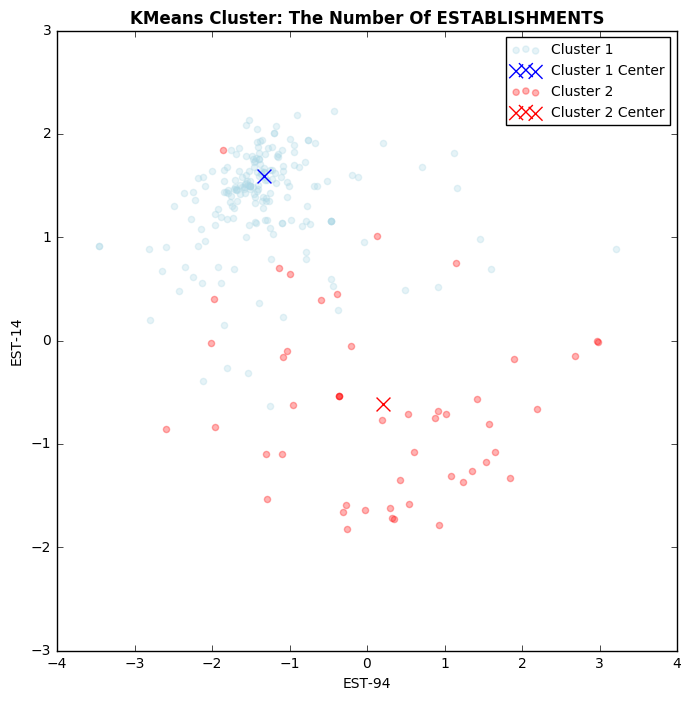

In [46]:
plt.figure(figsize=(8,8))
plt.scatter(zipcode_shape[mod_km_2.labels_ == 0].iloc[:,5], zipcode_shape[mod_km_2.labels_ == 0].iloc[:,24], \
           color='lightblue', alpha=0.3, label="Cluster 1")
plt.scatter(centers_2[0][0], centers_2[0][-1], marker='x', s=100, color='blue', label="Cluster 1 Center")

plt.scatter(zipcode_shape[mod_km_2.labels_ == 1].iloc[:,5], zipcode_shape[mod_km_2.labels_ == 1].iloc[:,24], \
           color='red', alpha=0.3, label="Cluster 2")
plt.scatter(centers_2[1][0], centers_2[1][-1], marker='x', s=100, color='red', label="Cluster 2 Center")

plt.xlabel("EST-94")
plt.ylabel("EST-14")
plt.title("KMeans Cluster: The Number Of ESTABLISHMENTS", fontweight = 'bold')
plt.legend(fontsize=10, loc='best')

In [35]:
kmeans_cluster = KMeans(2).fit(zipcode_shape.iloc[:, range(5,26)])
centers = kmeans_cluster.cluster_centers_
zipcode_shape['km_labels'] = kmeans_cluster.labels_

### Plotting the Time-Series for 2 Clusters

TypeError: 'range' object does not support item assignment

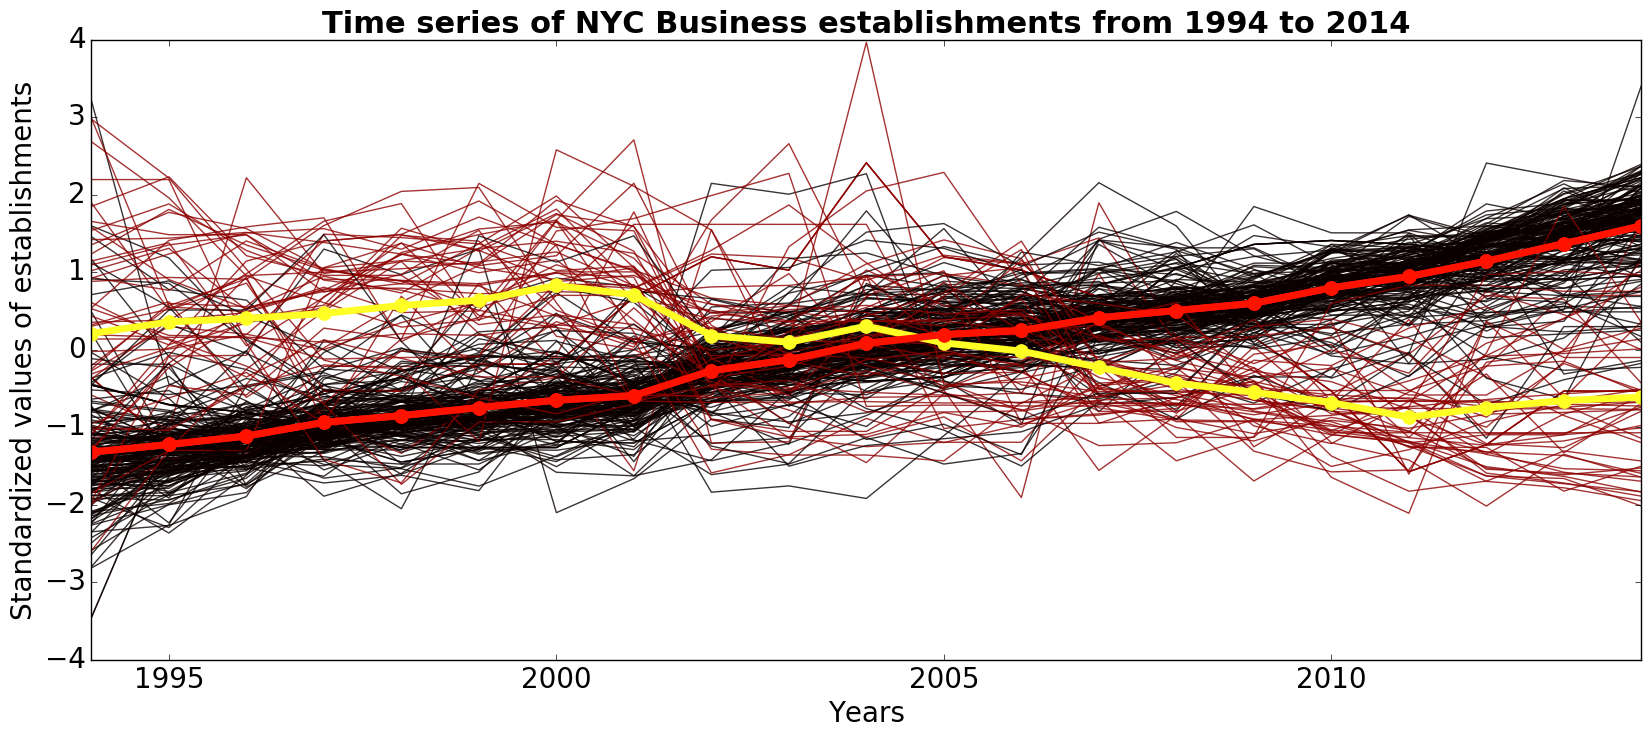

In [47]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca()
for i in range(len(zipcode_shape)):
    ax.plot(range(1994,2015), zipcode_shape.iloc[i,range(5,26)], 
            '-', lw = 1, alpha = 0.8, c=cm.hot(zipcode_shape.km_labels[i]*50) )
plt.xlim(1994,2014)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Standardized values of establishments", fontsize=20)
plt.title('Time series of NYC Business establishments from 1994 to 2014', 
          fontsize=22, fontweight = 'bold')
for i in range(len(centers)):
    plt.plot(range(1994,2015),centers[i], 
              '.-', ms = 20, lw = 5, c=cm.hot((i+1)*100))

lines = range(len(centers))    
for i in range(len(centers)):
    line, = plt.plot(range(1994,2015),centers[i], 
                    '.-', ms = 20, lw = 5, c=cm.hot(((i+1)*100)), 
                     label = 'cluster'+ str(i))
    lines[i] = (line)

plt.show()

### Figure-3: The above plot shows the time series of "number of business establishments" in different zipcodes in NYC from 1994 to 2014. 
- The time series of the zipcodes is standarized and clustered into 2 groups.

### Plotting KMeans Clusters Spatially

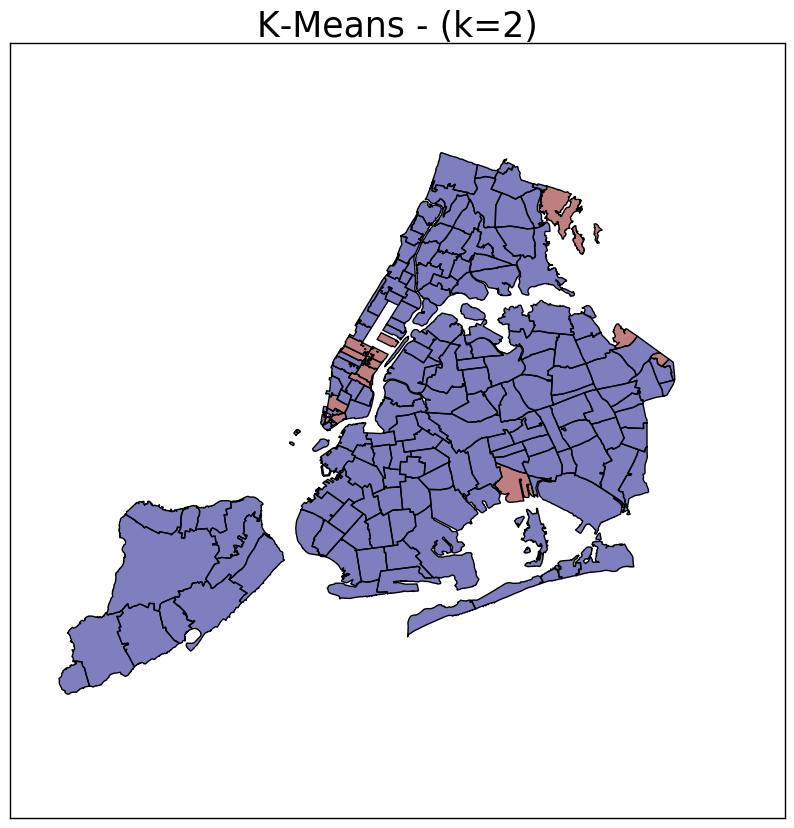

In [49]:
f, ax = plt.subplots(figsize=(10,10))
zipcode_shape.plot(cmap='jet', column='km_labels', ax=ax, categorical=True, k=2)
ax.set_title("K-Means - (k=2)", fontsize=25)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

### Plotting for K-Means Cluster Number = 3

In [51]:
mod_km_3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
                verbose=0, random_state=None).fit(X)

In [52]:
centers_3 = mod_km_3.cluster_centers_

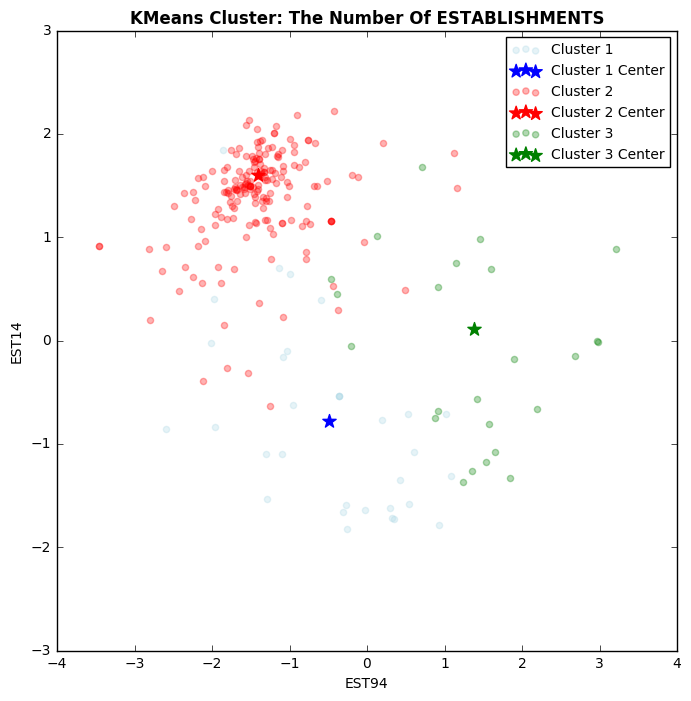

In [70]:
plt.figure(figsize=(8,8))
plt.scatter(zipcode_shape[mod_km_3.labels_ == 0].iloc[:,5], zipcode_shape[mod_km_3.labels_ == 0].iloc[:,24], \
           color='lightblue', alpha=0.3, label="Cluster 1")
plt.scatter(centers_3[0][0], centers_3[0][-1], marker='*', s=100, color='blue', label="Cluster 1 Center")

plt.scatter(zipcode_shape[mod_km_3.labels_ == 1].iloc[:,5], zipcode_shape[mod_km_3.labels_ == 1].iloc[:,24], \
           color='red', alpha=0.3, label="Cluster 2")
plt.scatter(centers_3[1][0], centers_3[1][-1], marker='*', s=100, color='red', label="Cluster 2 Center")

plt.scatter(zipcode_shape[mod_km_3.labels_ == 2].iloc[:,5], zipcode_shape[mod_km_3.labels_ == 2].iloc[:,24], \
           color='green', alpha=0.3, label="Cluster 3")
plt.scatter(centers_3[2][0], centers_3[2][-1], marker='*', s=100, color='green', label="Cluster 3 Center")

plt.xlabel("EST94")
plt.ylabel("EST14")
plt.title("KMeans Cluster: The Number Of ESTABLISHMENTS", fontweight = 'bold')
plt.legend(fontsize=10, loc='best')

In [54]:
kmeans_cluster_3 = KMeans(3).fit(zipcode_shape.iloc[:, range(5,26)])
centers_3 = kmeans_cluster_3.cluster_centers_
zipcode_shape['km_labels'] = kmeans_cluster_3.labels_

### Plotting the Time-Series for 3 Clusters

TypeError: 'range' object does not support item assignment

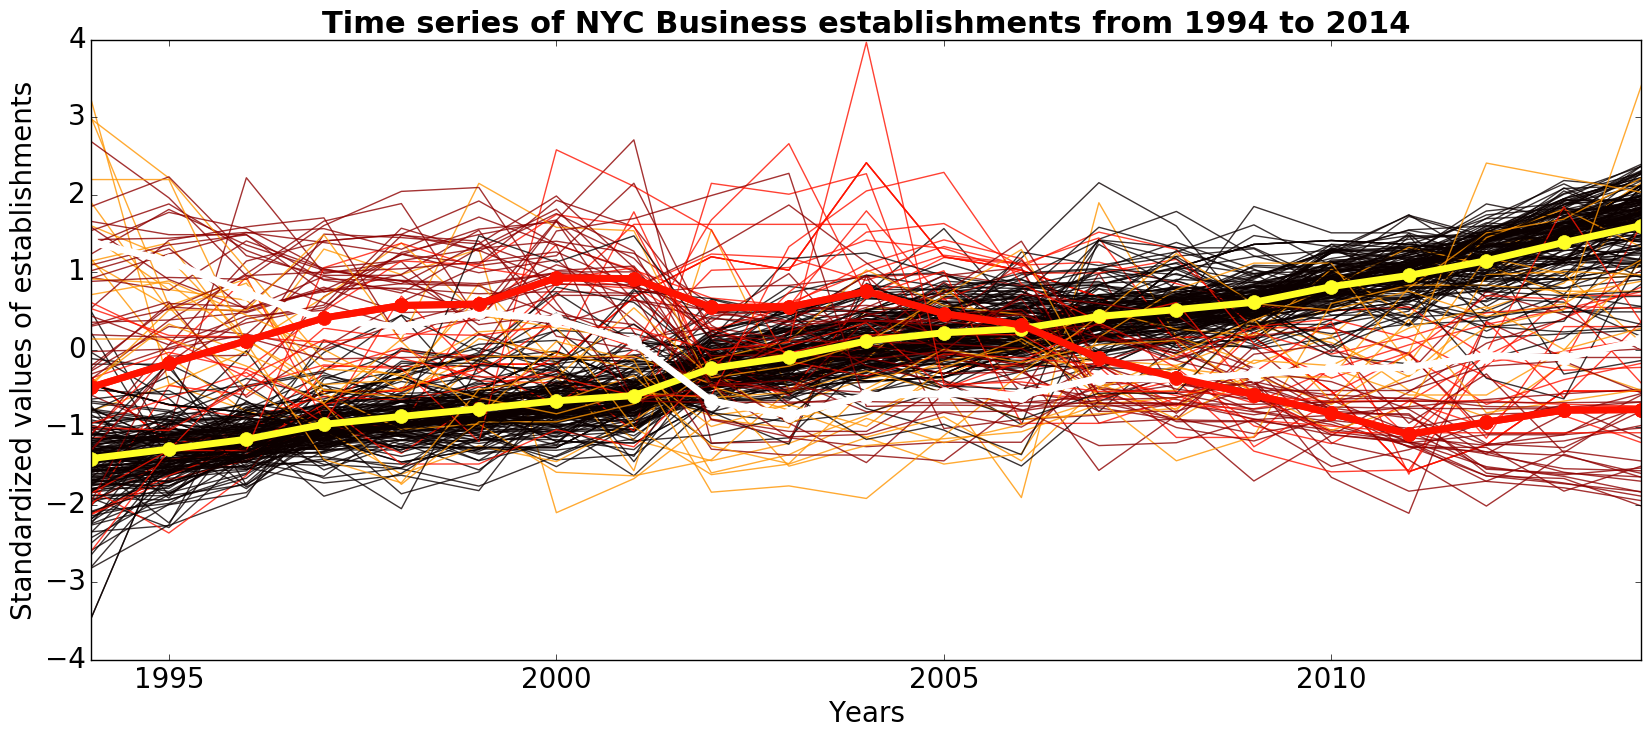

In [71]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca()
for i in range(len(zipcode_shape)):
    ax.plot(range(1994,2015), zipcode_shape.iloc[i,range(5,26)], 
            '-', lw = 1, alpha = 0.8, c=cm.hot(zipcode_shape.km_labels[i]*50) )
plt.xlim(1994,2014)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Standardized values of establishments", fontsize=20)
plt.title('Time series of NYC Business establishments from 1994 to 2014', 
          fontsize=22, fontweight = 'bold')
for i in range(len(centers_3)):
    plt.plot(range(1994,2015),centers_3[i], 
              '.-', ms = 20, lw = 5, c=cm.hot((i+1)*100))

lines = range(len(centers_3))    
for i in range(len(centers_3)):
    line, = plt.plot(range(1994,2015),centers_3[i], 
                    '.-', ms = 20, lw = 5, c=cm.hot(((i+1)*100)), 
                     label = 'cluster'+ str(i))
    lines[i] = (line)

plt.show()

### Figure-6: The above plot shows the time series of "number of business establishments" in different zipcodes in NYC from 1994 to 2014. 
- The time series of the zipcodes is standarized and clustered into 3 groups.

### Plotting KMeans Clusters Spatially

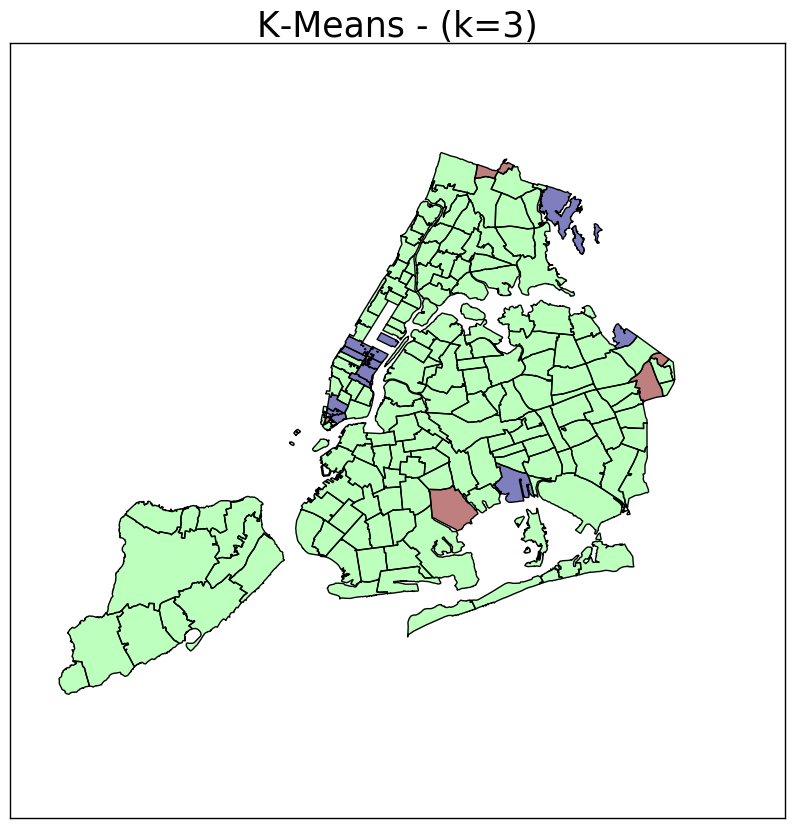

In [55]:
f, ax = plt.subplots(figsize=(10,10))
zipcode_shape.plot(cmap='jet', column='km_labels', ax=ax, categorical=True, k=3)
ax.set_title("K-Means - (k=3)", fontsize=25)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

### Plotting for K-Means Cluster Number = 4

In [56]:
mod_km_4 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
                verbose=0, random_state=None).fit(X)

In [57]:
centers_4 = mod_km_4.cluster_centers_

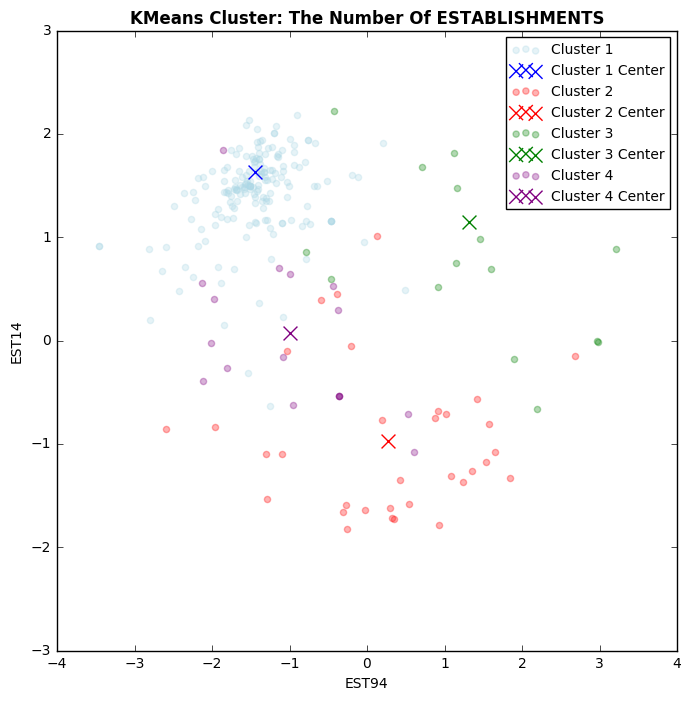

In [58]:
plt.figure(figsize=(8,8))
plt.scatter(zipcode_shape[mod_km_4.labels_ == 0].iloc[:,5], zipcode_shape[mod_km_4.labels_ == 0].iloc[:,24], \
           color='lightblue', alpha=0.3, label="Cluster 1")
plt.scatter(centers_4[0][0], centers_4[0][-1], marker='x', s=100, color='blue', label="Cluster 1 Center")

plt.scatter(zipcode_shape[mod_km_4.labels_ == 1].iloc[:,5], zipcode_shape[mod_km_4.labels_ == 1].iloc[:,24], \
           color='red', alpha=0.3, label="Cluster 2")
plt.scatter(centers_4[1][0], centers_4[1][-1], marker='x', s=100, color='red', label="Cluster 2 Center")

plt.scatter(zipcode_shape[mod_km_4.labels_ == 2].iloc[:,5], zipcode_shape[mod_km_4.labels_ == 2].iloc[:,24], \
           color='green', alpha=0.3, label="Cluster 3")
plt.scatter(centers_4[2][0], centers_4[2][-1], marker='x', s=100, color='green', label="Cluster 3 Center")

plt.scatter(zipcode_shape[mod_km_4.labels_ == 3].iloc[:,5], zipcode_shape[mod_km_4.labels_ == 3].iloc[:,24], \
           color='purple', alpha=0.3, label="Cluster 4")
plt.scatter(centers_4[3][0], centers_4[3][-1], marker='x', s=100, color='purple', label="Cluster 4 Center")

plt.xlabel("EST94")
plt.ylabel("EST14")
plt.title("KMeans Cluster: The Number Of ESTABLISHMENTS", fontweight = 'bold')
plt.legend(fontsize=10, loc='best')

In [59]:
#KMeans cluster
kmeans_cluster_4 = KMeans(4).fit(zipcode_shape.iloc[:, range(5,26)])
centers_4 = kmeans_cluster_4.cluster_centers_
zipcode_shape['km_labels'] = kmeans_cluster_4.labels_

### Plotting the Time-Series for 4 Clusters

TypeError: 'range' object does not support item assignment

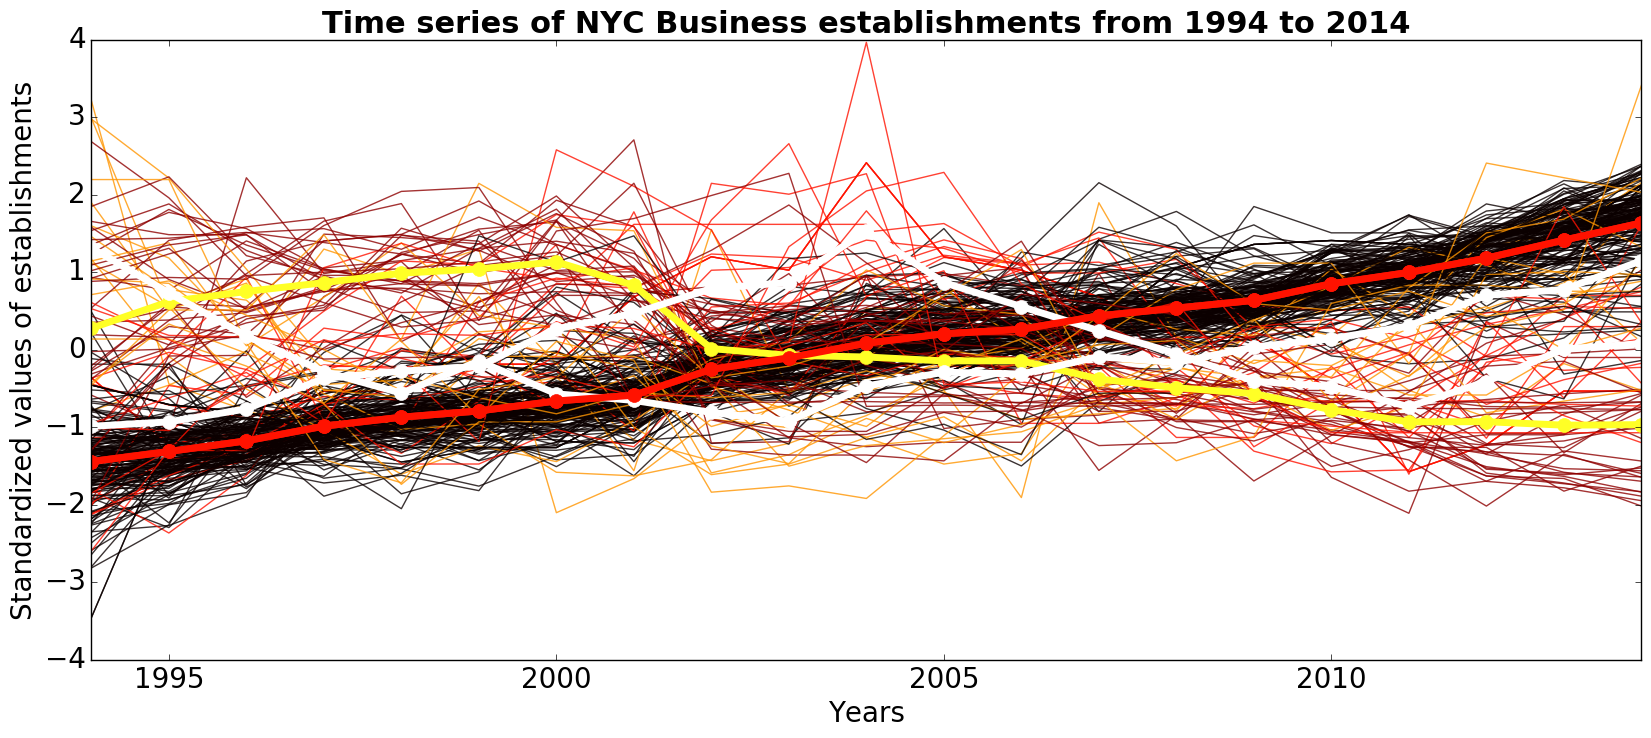

In [72]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca()
for i in range(len(zipcode_shape)):
    ax.plot(range(1994,2015), zipcode_shape.iloc[i,range(5,26)], 
            '-', lw = 1, alpha = 0.8, c=cm.hot(zipcode_shape.km_labels[i]*50) )
plt.xlim(1994,2014)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Standardized values of establishments", fontsize=20)
plt.title('Time series of NYC Business establishments from 1994 to 2014', 
          fontsize=22, fontweight = 'bold')
for i in range(len(centers_4)):
    plt.plot(range(1994,2015),centers_4[i], 
              '.-', ms = 20, lw = 5, c=cm.hot((i+1)*100))

lines = range(len(centers_4))    
for i in range(len(centers_4)):
    line, = plt.plot(range(1994,2015),centers_4[i], 
                    '.-', ms = 20, lw = 5, c=cm.hot(((i+1)*100)), 
                     label = 'cluster'+ str(i))
    lines[i] = (line)

plt.show()

### Figure-9: The above plot shows the time series of "number of business establishments" in different zipcodes in NYC from 1994 to 2014. 
- The time series of the zipcodes is standarized and clustered into 4 groups.

### Plotting KMeans Clusters Spatially

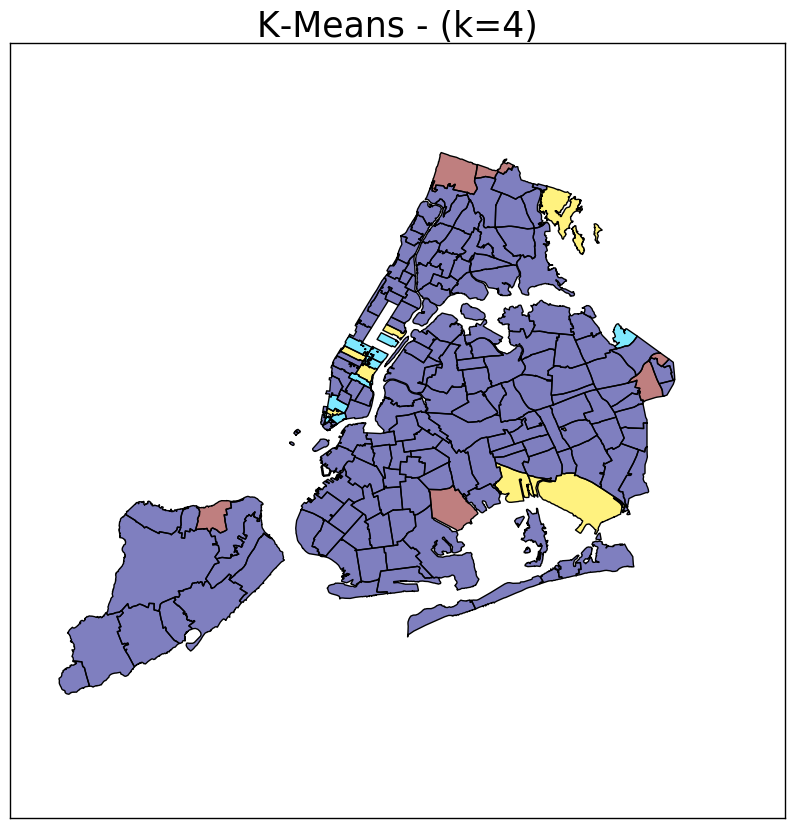

In [73]:
f, ax = plt.subplots(figsize=(10,10))
zipcode_shape.plot(cmap='jet', column='km_labels', ax=ax, categorical=True, k=4)
ax.set_title("K-Means - (k=4)", fontsize=25)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

### Using another Clustering Algorithm - Hierarchial Clustering Dandogram

In [61]:
Z = linkage(zipcode_shape.iloc[:,range(5,26)], 'ward')

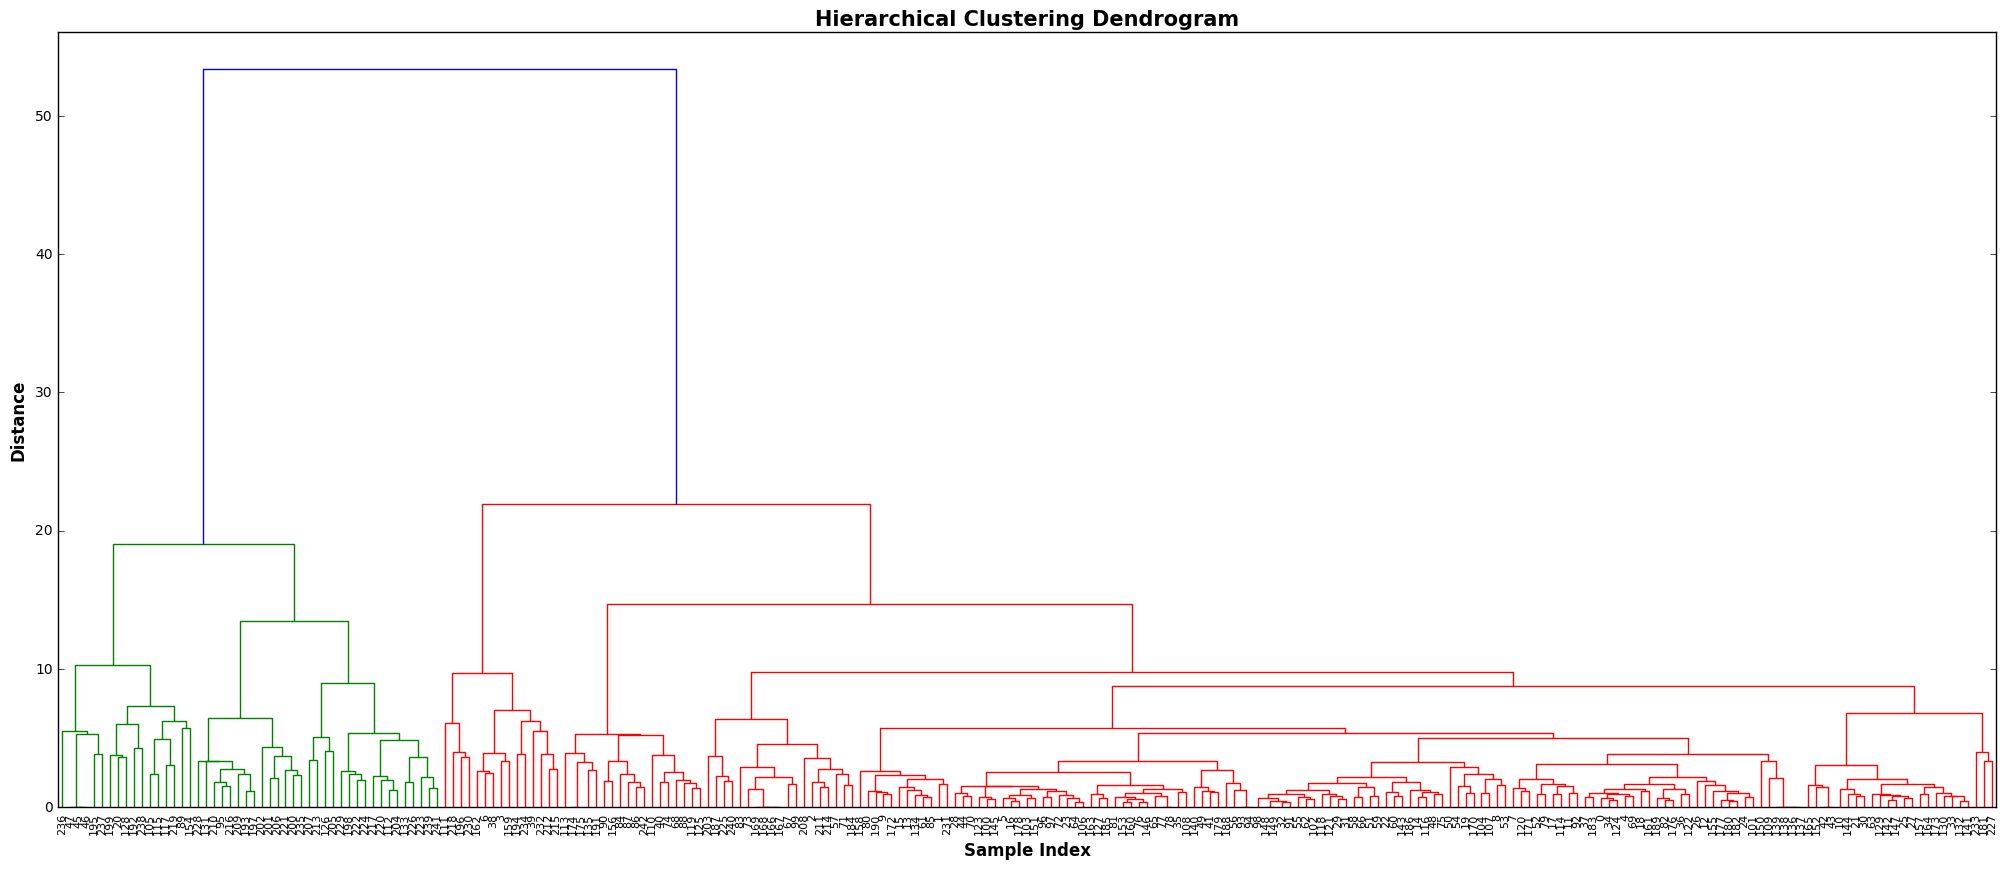

In [62]:
plt.figure(figsize=(25,10))

plt.title('Hierarchical Clustering Dendrogram', fontsize = 15, fontweight = 'bold')
plt.xlabel('Sample Index', fontsize = 12, fontweight = 'bold')
plt.ylabel('Distance', fontsize = 12, fontweight = 'bold')

dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

plt.show()

In [63]:
HC_label = fcluster(Z, 4, criterion='maxclust')

In [64]:
zipcode_shape_2 = zipcode_shape.copy()
zipcode_shape_2['HC'] = HC_label
zipcode_shape_2['HC_'] = zipcode_shape_2.HC.replace([1,4],[4,1])

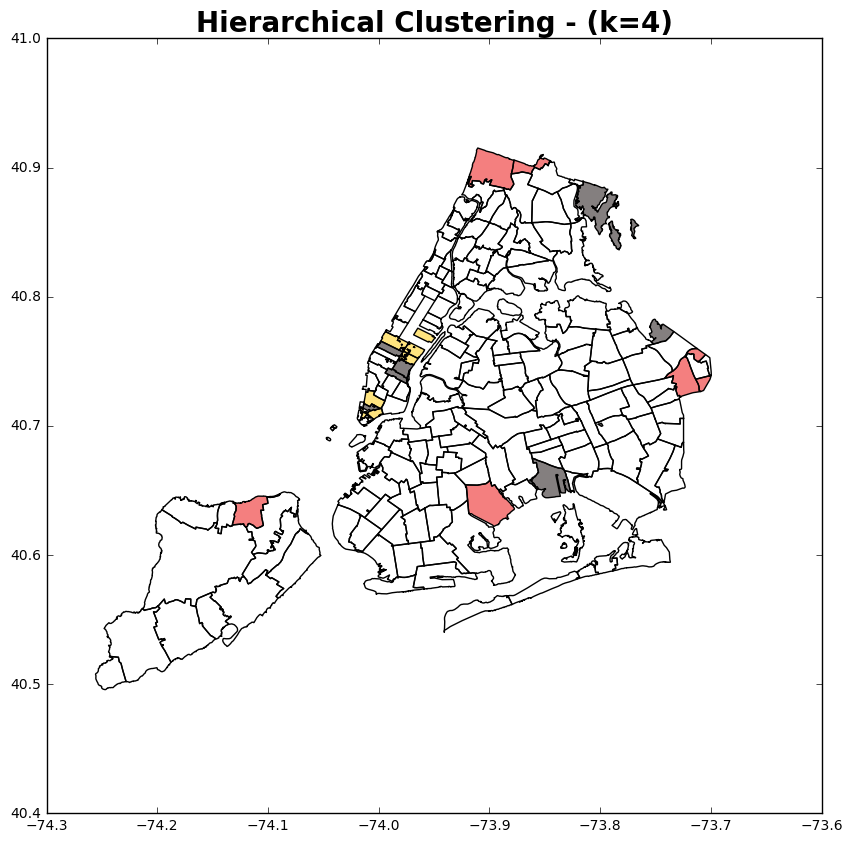

In [67]:
f, ax = plt.subplots(figsize=(10,10))
zipcode_shape_2.plot(cmap='hot_r', column='HC_', ax=ax, categorical=True, k=4)
ax.set_title("Hierarchical Clustering - (k=4)", fontsize=20, fontweight = 'bold')

Compare the results of the 2 algorithms

Attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator